# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 5 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 15 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 15 баллов
* Задача 5 &mdash; 25 баллов


-----

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable
import time

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1  
Создайте матрицу 10x10 по правилу:  
- если сумма индексов элемента четна - присваиваем элементу значение 0
- если сумма индексов элемента нечетна - присваиваем элементу значение 1

Исаользуйте numpy. Визуализируйте полученную матрицу с помощью `plt.imshow()`.

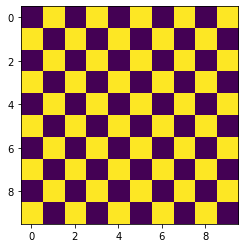

In [80]:
matrixSide = 10
matrix = np.array([[(i+j)%2 for i in range(matrixSide)] for j in range(matrixSide)])
plt.imshow(matrix);

### Задача 2
1) Создайте матрицу 10х10, каждый элемент которой равен сумме индексов этого элемента.  Используйте numpy.  Визуализируйте с помощью `plt.imshow()`.

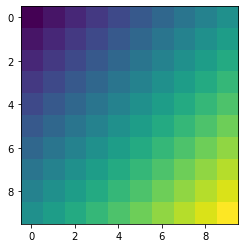

In [81]:
matrix = np.zeros((matrixSide,matrixSide))
for i in range(matrixSide):
    for j in range(matrixSide):
        matrix[i, j] = i+j
plt.imshow(matrix);

2. Повторите свое решение <font color='red'> без использования циклов <font color='black'> (list comrehension использовать не запрещено).

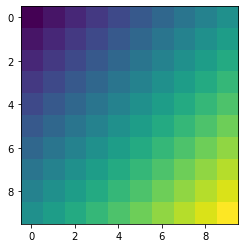

In [82]:
matrix = np.array([[i+j for i in range(matrixSide)] for j in range(matrixSide)])
plt.imshow(matrix);

### Задача 3
Изобразите график параметрически заданной функции. Переменные необходимо задавать с помощью Numpy.

$$ x=\alpha\times\left(\cos t+\frac{cos(\beta t)}{\beta}\right)$$

$$y=\alpha\times\left(\sin t−\frac{sin(\beta t)}{\beta}\right)$$

$$t∈[0;20π]$$ 

1. Реализуйте функции $x(t, \alpha, \beta)$ и $y(t, \alpha, \beta)$

In [83]:
def getX(t: np.ndarray, alpha: float, beta: float)->np.ndarray:
    return alpha*(np.cos(t) + np.cos(beta*t)/beta)
def getY(t: np.ndarray, alpha: float, beta: float)->np.ndarray:
    return alpha*(np.sin(t) - np.sin(beta*t)/beta)

2. Постройте график в осях $x$ и $y$ при $\alpha=4$ и $\beta=1.1$. Подпишите оси.

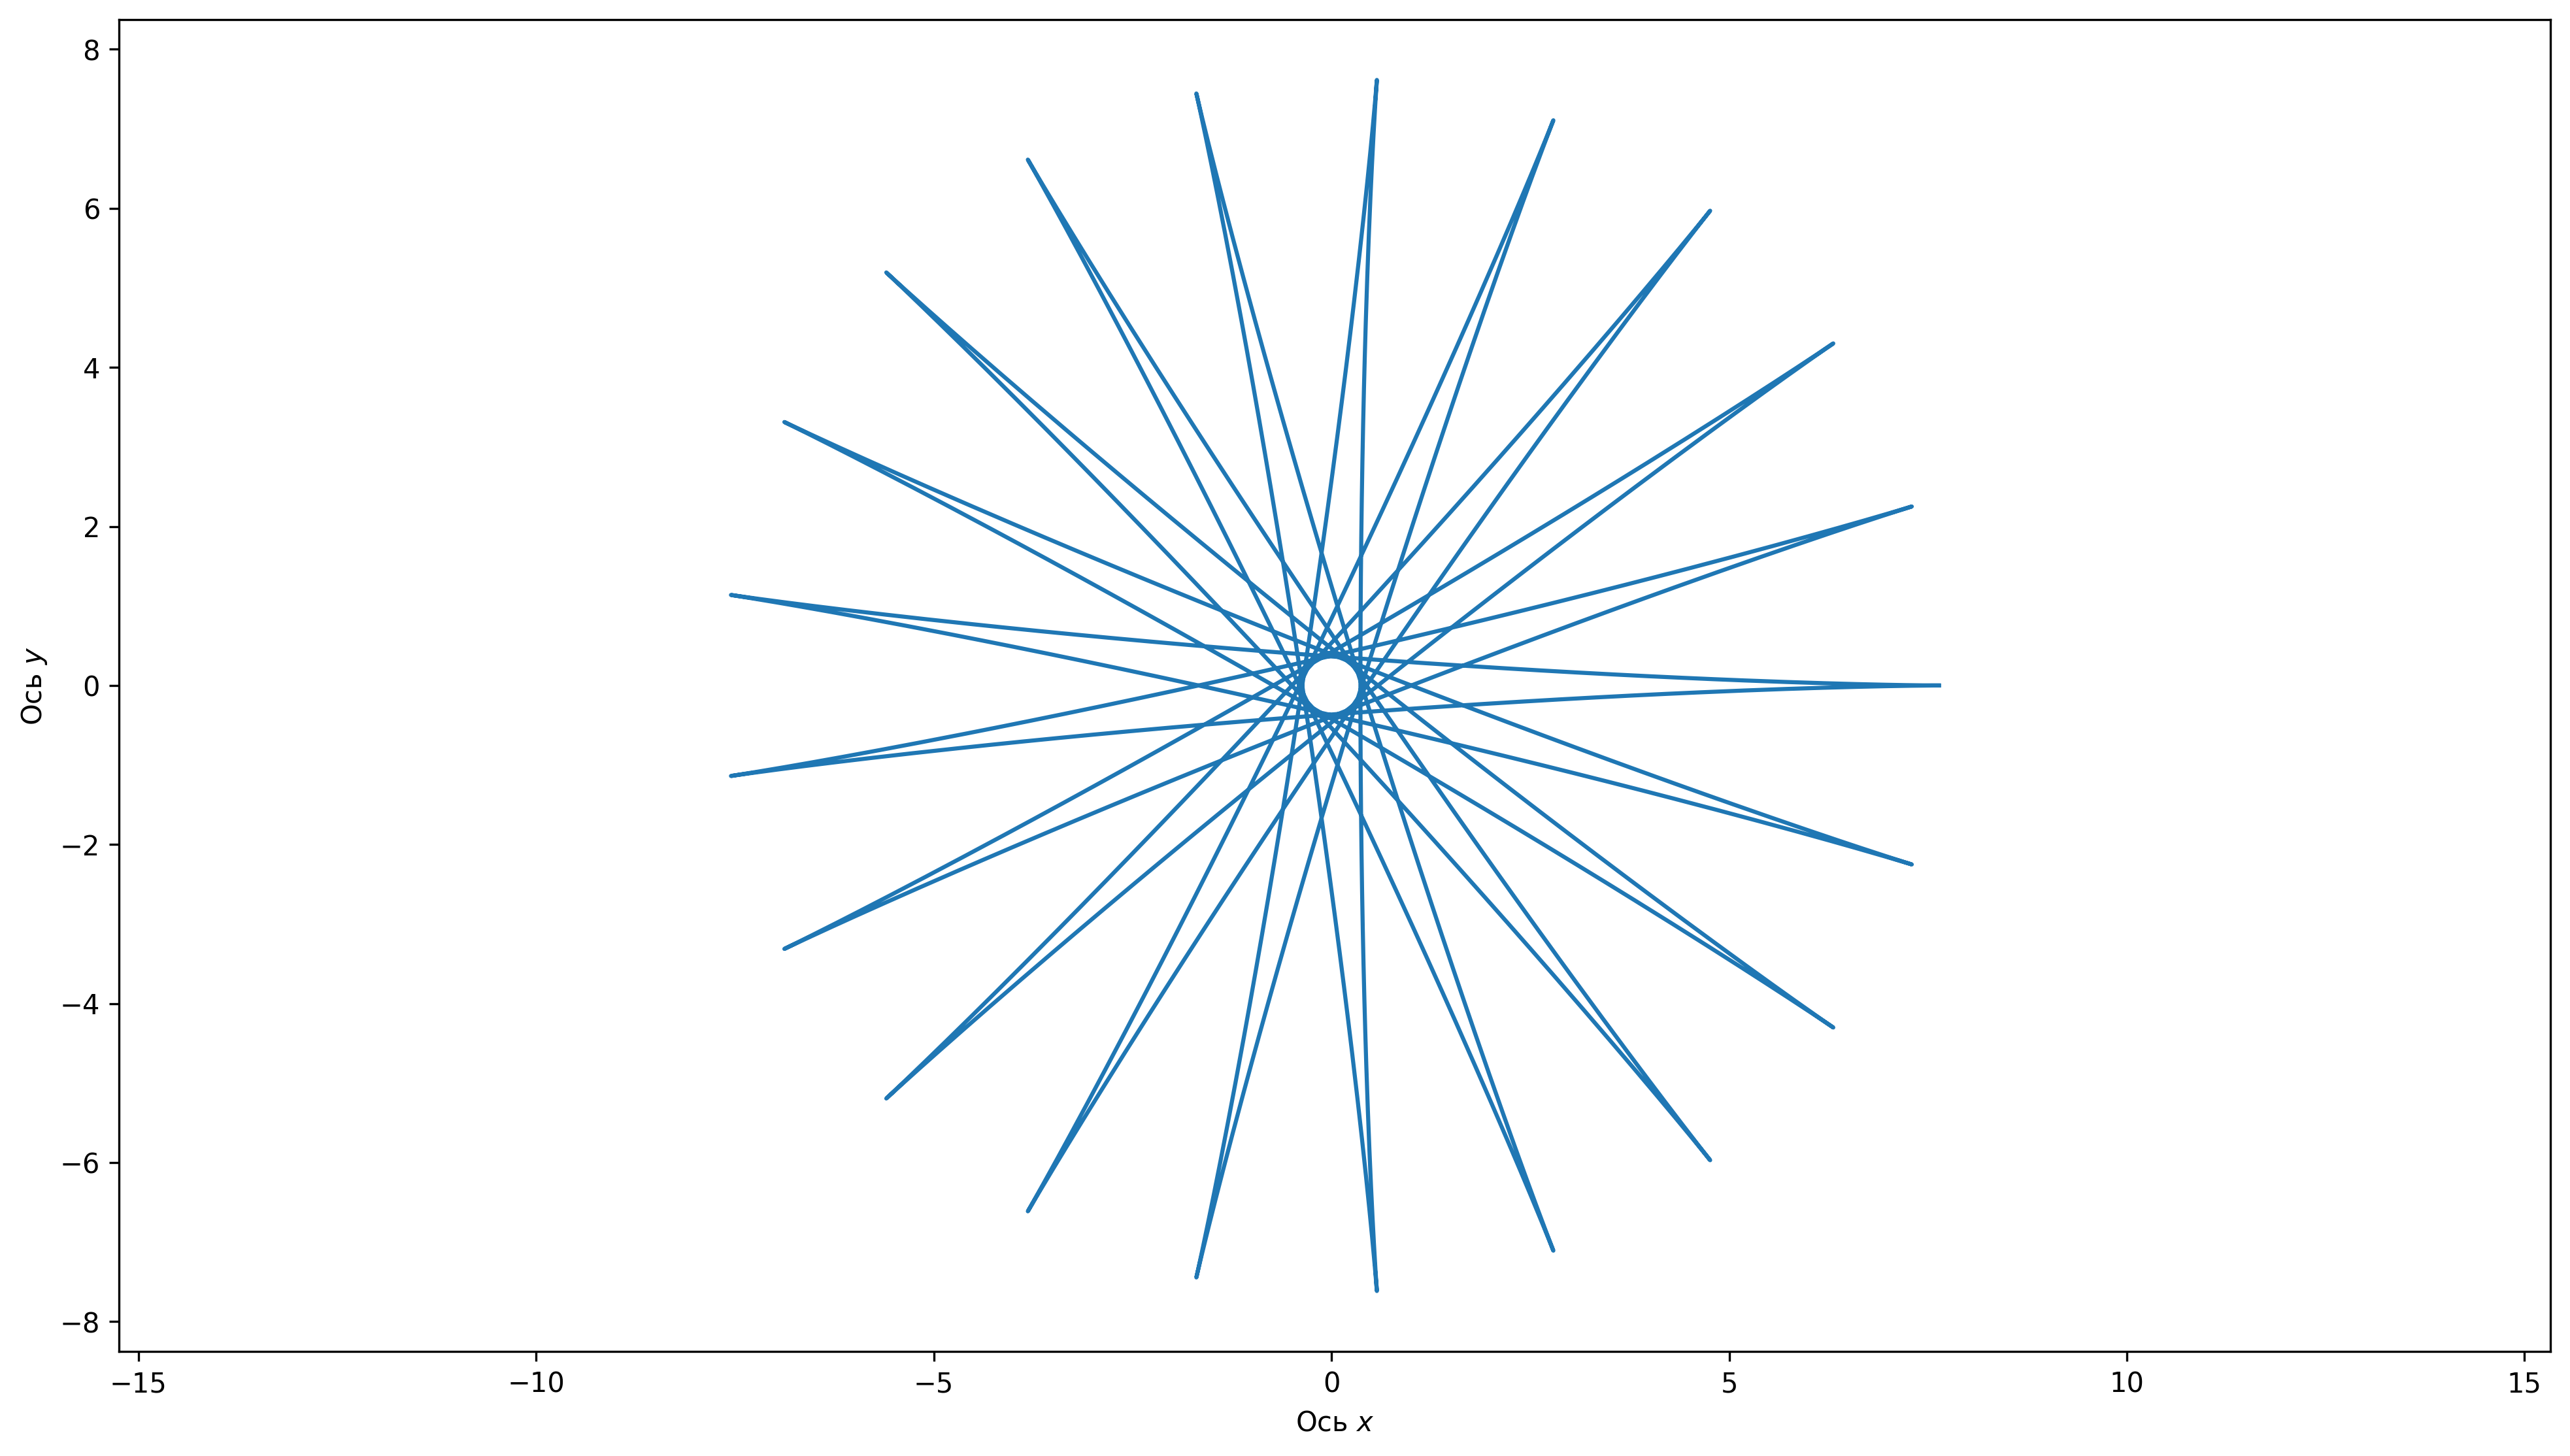

In [84]:
alpha, beta = 4, 1.1
t = np.linspace(0,20*np.pi,2000)
x, y = getX(t,alpha,beta), getY(t, alpha, beta)

fig, ax = plt.subplots(figsize = (16,9), dpi = 300)
plt.xlabel(r"Ось $x$")
plt.ylabel(r"Ось $y$")
plt.plot(x, y)
plt.axis("equal")
plt.show()


3. Постройте графики для различных значений $\alpha$ и $\beta$.  
- $\alpha$ : [2, 4, 6, 8, 10]  
- $\beta$ : [1.2, 1.8, 2, 5, 10]  

У вас должна получиться сетка 5х5 графиков. На каждом графике укажите параметры $\alpha$ и $\beta$.

In [85]:
alphaValues, betaValues = [2,4,6,8,10], [1.2,1.8,2,5,10]

fig, ax = plt.subplots(len(alphaValues),len(betaValues), figsize = (32,18), dpi = 500)
for i,alpha in enumerate(alphaValues):
    for j,beta in enumerate(betaValues):
        ax[i,j].plot(getX(t,alpha,beta),getY(t,alpha,beta))
        ax[i,j].axis("equal")
        ax[i,j].set_title(r"$ \alpha = {}, \beta = {}$".format(alpha,beta))
        # ax[i,j].set_xlabel(r"Ось $x$")
        # ax[i,j].set_ylabel(r"Ось $y$")

### Задача 4

Выполните все шаги, описанные ниже и визуализируйте полученный результат. Результатом является квадратная матрица.

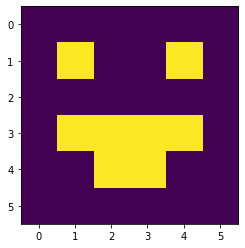

In [86]:
# Создать матрицу а1 размера 3 x 3 из нулей
a1 = np.zeros((3, 3))
# Приравнять единице значения матрицы a1 по координатам (1, 1)
a1[1][1] = 1
# Скопировать матрицу a1 в матрицу a2
a2 = a1.copy()
# Конкатенировать матрицы a1 и a2 по оси 1 и записать результат в матрицу a3
a3 = np.concatenate((a1, a2), axis = 1)
# Создать матрицу a4 размера 6 из нулей
a4 = np.zeros(6)
# Запонить всё единицами кроме нулевой и последней ячейки в матрице a4
a4[1:a4.shape[0]-1] = 1
# Создать матрицу a5 размера 6 из нулей
a5 = np.zeros(6)
# Заполнить ячейки с координатами 2 и 3 единицами в матрице а5
a5[[2,3]] = 1
# Объединить матрицы а4 и а5 по нулевой оси и записать результат в матрицу а6
a6 = np.stack((a4,a5),axis = 0)
# Создать матрицу а7 размера 6 из нулей
a7 = np.zeros(6)
# Конкатенировать матрицы а6 и а7 по нулевой оси и записать результат в матрицу а8
a8 = np.concatenate((a6,a7[np.newaxis,:]),axis=0)
# Конкатенировать матрицы а3 и а8 по нулевой оси и записать результат в матрицу а9
a9 = np.concatenate((a3,a8),axis = 0)
# Визуализировать матрицу а9 с помощью plt.imshow()
plt.imshow(a9);


### Задача 5
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать
объекты размерности три. 

Запрещается пользоваться функциями, реализующими матричное
умножение ( numpy.dot , операция @ , операция умножения в классе numpy.matrix ). Разрешено
пользоваться только простыми векторно-арифметическими операциями над numpy.array , а также
преобразованиями осей.

 *Комментарий*: При рациональном подходе ваше решение займет 1 строчку

In [87]:
def matrix_multiplication(A, B):
    return np.array([[np.sum(A[i]*B[:,j]) for j in range(B.shape[1])] for i in range(A.shape[0])])

def matrix_multiplication2(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return np.einsum('ij,jk->ik', A, B) 

def numpy_matrix_multiplication(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return A@B

Описание решения:    
- `A[i]` - i-ая строка матрицы $A$
- `B[:,j]` - j-ый столбец матрицы $B$
- В результате поэлементного умножения получаем вектор: $(a_{i1} b_{1j} \ a_{i2}b_{2j} \dots)$
- Сумма элементов вектора есть скалярное произведение строки на столбец

Решение 2(через суммы Эйнштейна) разобрано в файле семинара

Проверьте правильность реализации на случайных матрицах. Должен получится ноль.


In [88]:
A = np.random.rand(10, 20)
B = np.random.rand(20, 30)
np.abs(matrix_multiplication2(A, B) - A @ B).sum()

8.171241461241152e-14

Сравните время работы вашей функции и любой из реализаций в numpy.   

In [89]:
def generateMatrix(size: int) -> None:
    global A,B
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

def checkTime(multFunc: Callable, A: np.ndarray, B: np.ndarray) -> int:
    nowTime = time.time_ns()
    C = multFunc(A,B)
    return (time.time_ns() - nowTime)

In [90]:
q = 50
timeNumpy,timeMatMult = [],[]
timeEinSum = []
for _ in range(q):
    generateMatrix(int(200*np.random.rand() + 100))
    timeNumpy.append(checkTime(numpy_matrix_multiplication,A,B))
    timeMatMult.append(checkTime(matrix_multiplication,A,B))
    timeEinSum.append(checkTime(matrix_multiplication2,A,B))
    
avgNumpy = np.mean(timeNumpy)
avgMatMult = np.mean(timeMatMult)
avgEinSum = np.mean(timeEinSum)

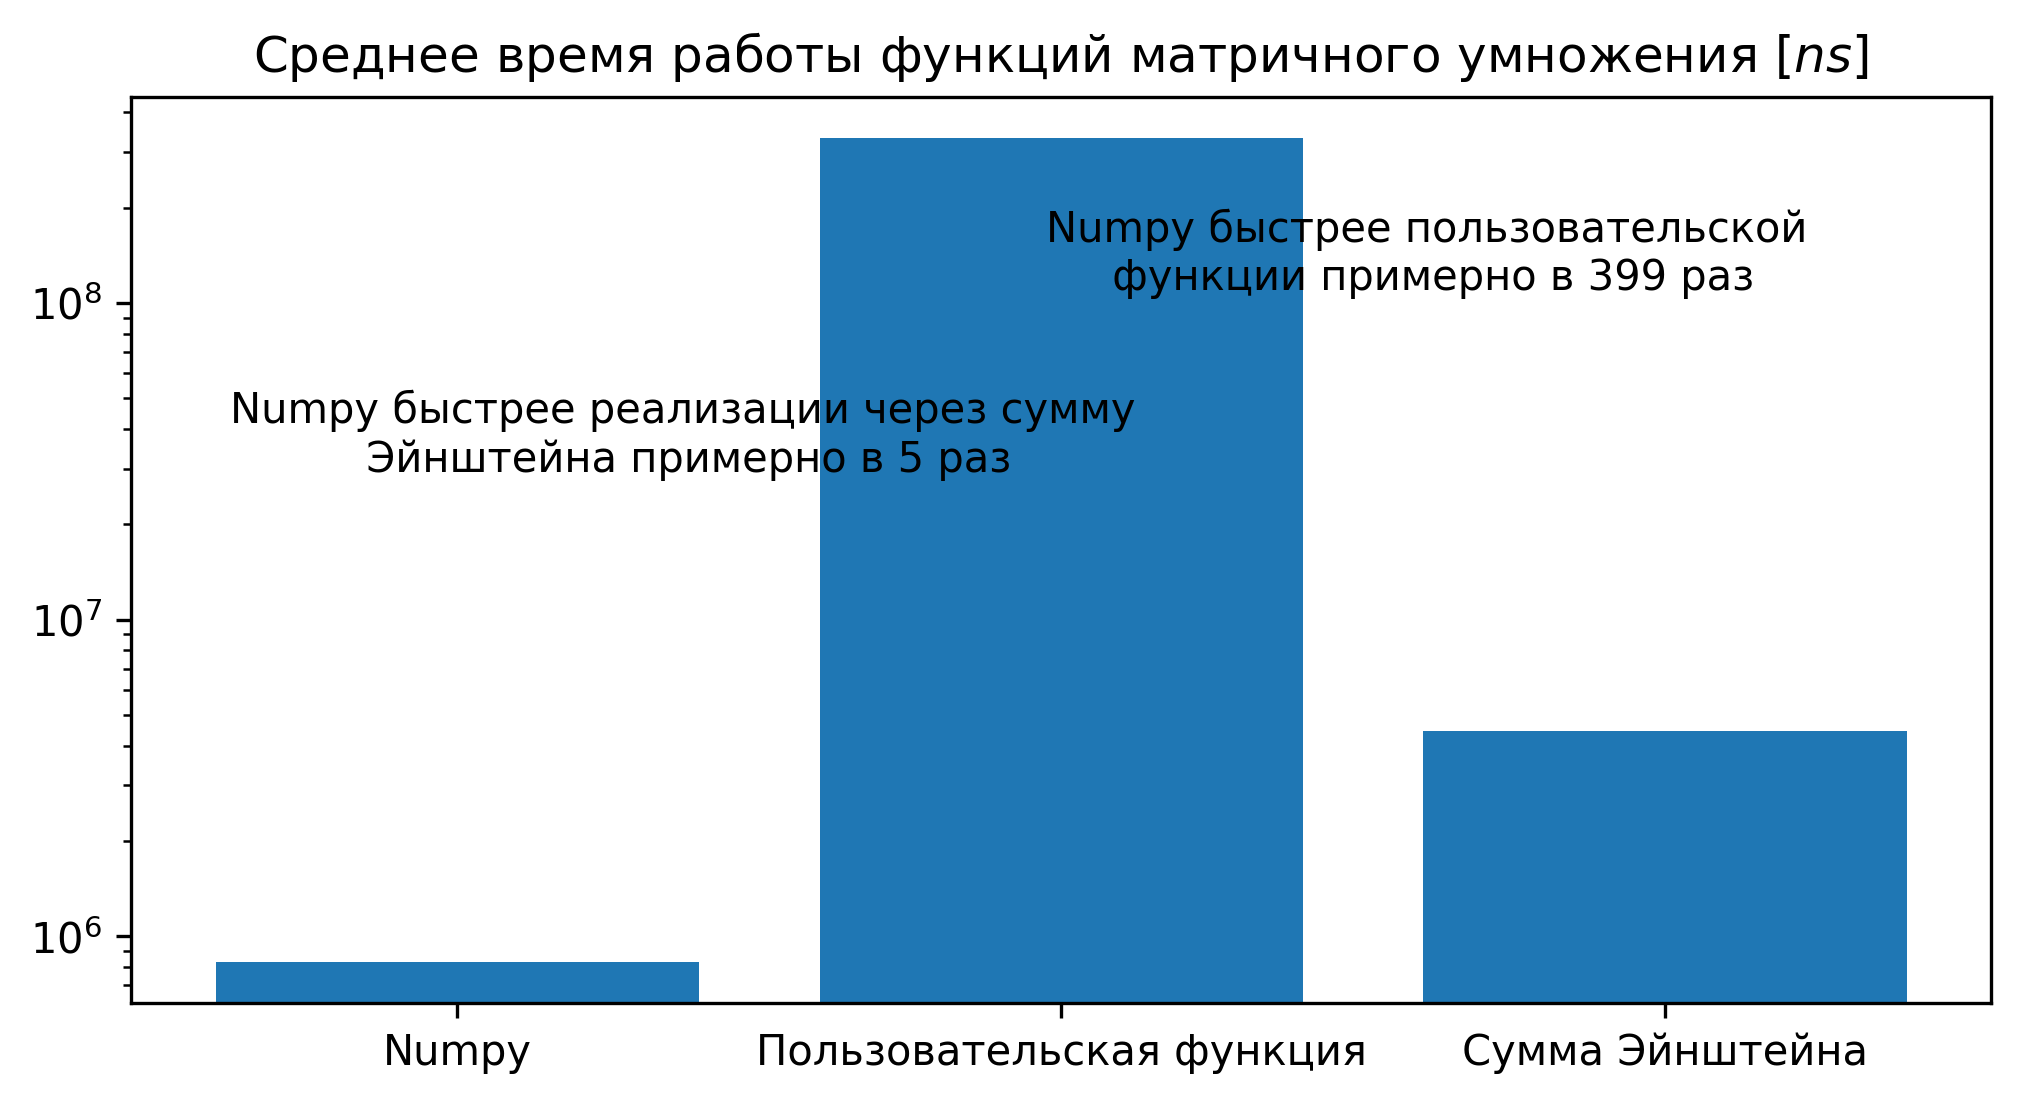

In [91]:
fig, ax = plt.subplots(figsize = (8,4),dpi = 300)

plt.bar(['Numpy','Пользовательская функция','Сумма Эйнштейна'],
        [avgNumpy, avgMatMult,avgEinSum])

plt.text(0.7, 0.8, 
        "Numpy быстрее пользовательской \n функции примерно в {} раз \n".format(round(avgMatMult/avgNumpy)),
        horizontalalignment='center',
        verticalalignment='center',
        transform = ax.transAxes,
        fontsize = 10)

plt.text(0.3, 0.6, 
        "Numpy быстрее реализации через сумму \n Эйнштейна примерно в {} раз \n".format(round(avgEinSum/avgNumpy)),
        horizontalalignment='center',
        verticalalignment='center',
        transform = ax.transAxes,
        fontsize = 10)

ax.set_yscale('log')
plt.title("Среднее время работы функций матричного умножения $[ns]$");